In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
root = "/content/gdrive/My Drive/datathon data/"

Mounted at /content/gdrive


In [4]:
account_dim = pd.read_csv("gdrive/My Drive/datathon data/account_dim_20250325.csv")

In [5]:
account_dim.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  cast_date_col = pd.to_datetime(column, errors="coerce")


,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,date_in_collection,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,employee_code,external_status_reason_code,special_finance_charge_ind,pscc_ind,ext_status_reason_cd_desc,account_card_type
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN,0,NaN,0,NaN,DUAL CARD
1,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24T00:00:00.000-04:00,2024-08-09T00:00:00.000-04:00,0,E,NaN,0,IQIIIQIA,"\\\\\\""""",NaN,0,NaN,1,NaN,DUAL CARD
2,JM78WNziiRWgmL8e,HGBHARRFT984,2024-05-05T00:00:00.000-04:00,2024-05-05T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,IIIQIQIIIIA,"\\\\\\""""",NaN,0,NaN,0,NaN,PLCC
3,bv4NLVhWTGCf8KgC,OSELW263,2024-07-28T00:00:00.000-04:00,2024-09-08T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,I1III1A,"\\\\\\""""",NaN,0,NaN,0,NaN,PLCC
4,nrXceQabYIHo31lp,HGBHARRFT984,2024-09-15T00:00:00.000-04:00,2024-09-15T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,"\\\\\\""""","\\\\\\""""",NaN,0,NaN,0,NaN,PLCC


In [6]:
# the features that we'll need for classification
account_dim = account_dim[["current_account_nbr", "payment_hist_1_12_mths", "payment_hist_13_24_mths", "ext_status_reason_cd_desc"]]

# renaming columns
account_dim.columns = ["account_number", "payment_history_12_months", "payment_history_24_months", "status_code"]

In [8]:
# prompt: filter out account_dim to rows that contain "6" or "7" in the "payment_hist_1_12_mths" or "payment_hist_13_24_mths" columns, where each value in these columns is a string of various characters of length 1 to 12

# are there any 6s or 7s?
filtered_account_dim = account_dim[
    account_dim["payment_history_12_months"].astype(str).str.contains("6|7") |
    account_dim["payment_history_24_months"].astype(str).str.contains("6|7")
]


In [9]:
filtered_account_dim

,account_number,payment_history_12_months,payment_history_24_months,status_code


In [10]:
# removing description from status_code
account_dim["status_code"] = account_dim["status_code"].str[0:3]

In [11]:
account_dim

,account_number,payment_history_12_months,payment_history_24_months,status_code
0,nTgalbpd5Rsol7CA,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN
1,xYaLrD9IvmbVl1PB,IQIIIQIA,"\\\\\\""""",NaN
2,JM78WNziiRWgmL8e,IIIQIQIIIIA,"\\\\\\""""",NaN
3,bv4NLVhWTGCf8KgC,I1III1A,"\\\\\\""""",NaN
4,nrXceQabYIHo31lp,"\\\\\\""""","\\\\\\""""",NaN
...,...,...,...,...
18065,K8ixzIELRNtw1drn,ZZZZZQQQQQQQ,QQ#A,A35
18066,CRIi94oT7Dddh2zu,ZZZZZZZZZZZZ,ZZZZIA,A35
18067,XiW0as5dJX6GJRi0,ZZZIIIIIIIII,IIIA,A35
18068,Xu1i4wqn776tFKU6,Z0ZZZZIIAIQQ,QQQIQIA,A46


In [12]:
# Removing the people that most recently had "fraud/bad behavior" statuses
account_dim["most_recent_history"] = account_dim["payment_history_12_months"].str[0]
account_dim_after_dt = account_dim[~account_dim["most_recent_history"].isin(["Z", "C", "L", "U", "B", "F", "Z", "5", "4"])]
account_dim_after_dt

,account_number,payment_history_12_months,payment_history_24_months,status_code,most_recent_history
1,xYaLrD9IvmbVl1PB,IQIIIQIA,"\\\\\\""""",NaN,I
2,JM78WNziiRWgmL8e,IIIQIQIIIIA,"\\\\\\""""",NaN,I
3,bv4NLVhWTGCf8KgC,I1III1A,"\\\\\\""""",NaN,I
4,nrXceQabYIHo31lp,"\\\\\\""""","\\\\\\""""",NaN,\
5,L0r6GlmV0Ngx7E9P,"\\\\\\""""","\\\\\\""""",NaN,\
...,...,...,...,...,...
18055,UJ66aM7bqx8MbsYN,"\\\\\\""""","\\\\\\""""",NaN,\
18058,gxpvF2u6Jh4IzvoH,"\\\\\\""""","\\\\\\""""",A48,\
18060,r9HGFQwuQtD3EHGE,QQQQQQQQ#QQQ,QQA,A35,Q
18061,bAHrRnEX4bzPJcm8,QIQAQQQAZZIA,ZIAIA,NaN,Q


In [13]:
# prompt: Let's say I have a dataframe with a column of strings length through 24. I want to assign number values to each character in the string.
# Q, 0, % = 1
# C, L, U, W, X, 5, 4, 3, A, B, F, Z = -1
# E, I, 1, 2 = 0
# Then, I want to sum up these values and create a score that I will put in a new dataframe column.

def calculate_score(payment_history):
    score = 0
    for char in payment_history:
        if char in ['Q', '0', '%']: # good behavior gets rewarded
            score += 1
        elif char in ['C', 'L', 'U', 'W', 'X', '5', '4', '3', 'A', 'B', 'F', 'Z']: # bad behavior gets punished
            score -= 1
        elif char in ['E', 'I', '1', '2']:
            score += 0
    return score

account_dim['score'] = account_dim['payment_history_12_months'].astype(str).apply(calculate_score)
account_dim.head(20)

,account_number,payment_history_12_months,payment_history_24_months,status_code,most_recent_history,score
0,nTgalbpd5Rsol7CA,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN,Z,-11
1,xYaLrD9IvmbVl1PB,IQIIIQIA,"\\\\\\""""",NaN,I,1
2,JM78WNziiRWgmL8e,IIIQIQIIIIA,"\\\\\\""""",NaN,I,1
3,bv4NLVhWTGCf8KgC,I1III1A,"\\\\\\""""",NaN,I,-1
4,nrXceQabYIHo31lp,"\\\\\\""""","\\\\\\""""",NaN,\,0
5,L0r6GlmV0Ngx7E9P,"\\\\\\""""","\\\\\\""""",NaN,\,0
6,JiogbNNfOSWVGjdr,"\\\\\\""""","\\\\\\""""",NaN,\,0
7,nb2pG80DDq4ucyZI,QIQIQQQQQA,"\\\\\\""""",NaN,Q,6
8,kqrsB4FtU00uXpWU,IQQ,"\\\\\\""""",NaN,I,2
9,ppwFGSPBF57u8319,QIQQQQA,"\\\\\\""""",NaN,Q,4


In [14]:
account_dim["score"].describe()

,score
count,18070.000000
mean,-0.058937
std,8.109898
min,-12.000000
25%,-7.000000
50%,0.000000
75%,7.000000
max,12.000000


In [15]:
account_dim_after_dt['score'] = account_dim_after_dt['payment_history_12_months'].astype(str).apply(calculate_score)
account_dim_after_dt["score"].describe()

<ipython-input-15-edfbe431de89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_dim_after_dt['score'] = account_dim_after_dt['payment_history_12_months'].astype(str).apply(calculate_score)


,score
count,12028.000000
mean,4.146492
std,5.972776
min,-12.000000
25%,0.000000
50%,2.000000
75%,11.000000
max,12.000000


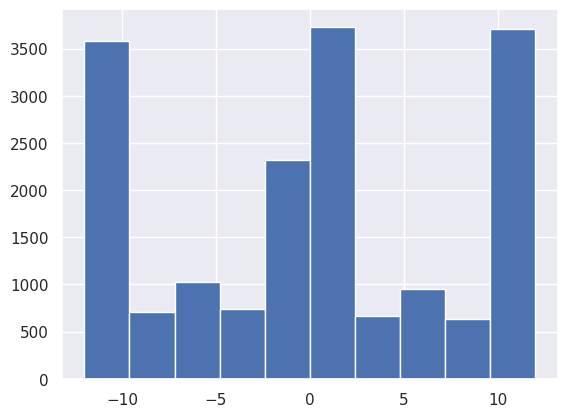

In [16]:
# score distribution for population
plt.hist(account_dim["score"])
plt.show()

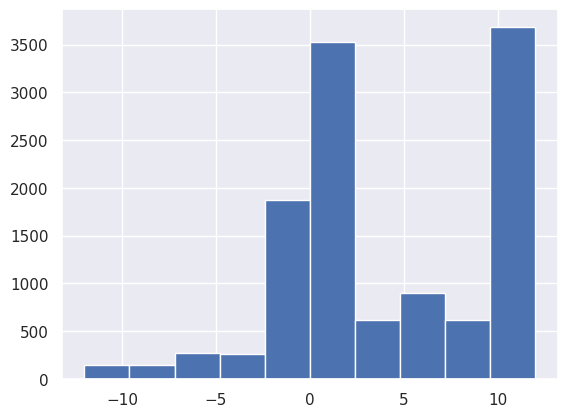

In [18]:
# score distribution for filtered population data
plt.hist(account_dim_after_dt["score"])
plt.show()

## Decision Tree:

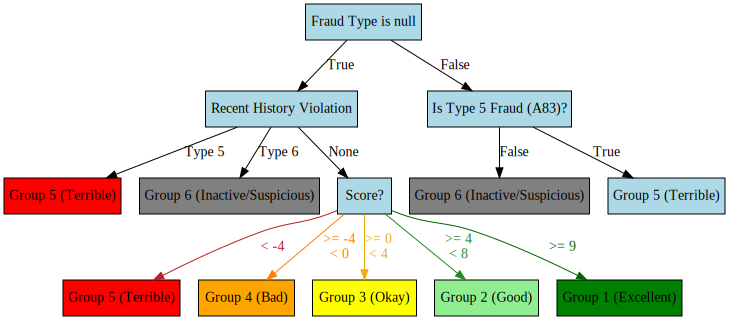

In [24]:
# digraph guide: https://graphviz.org/pdf/dotguide.pdf
# Augmented by Gemini

import graphviz
digraph = '''
digraph DecisionTree {
  a -> b [label="True"]
  b -> c [label="Type 5"]
  b -> d [label="Type 6"]
  b -> e [label="None"]
  e -> f [label="< -4",color="firebrick",fontcolor="firebrick"]
  e -> g [label=">= -4\n< 0", color="darkorange1", fontcolor="darkorange1"]
  e -> h [label=">= 0\n< 4",color="darkgoldenrod2", fontcolor="darkgoldenrod2"]
  e -> i [label=">= 4\n< 8",color="forestgreen",fontcolor="forestgreen"]
  e -> j [label=">= 9", color="darkgreen", fontcolor="darkgreen"]

  a -> k [label="False"]
  k -> l [label="False"]
  k -> m [label="True"]

  a [shape=box, style="filled", fillcolor="lightblue",label="Fraud Type is null"];
  b [shape=box, style="filled", fillcolor="lightblue",label="Recent History Violation"];
  c [shape=box, style="filled", fillcolor="red",label="Group 5 (Terrible)"];
  d [shape=box, style="filled", fillcolor="gray",label="Group 6 (Inactive/Suspicious)"];
  e [shape=box, style="filled", fillcolor="lightblue",label="Score?"];
  f [shape=box, style="filled", fillcolor="red",label="Group 5 (Terrible)"];
  g [shape=box, style="filled", fillcolor="orange",label="Group 4 (Bad)"];
  h [shape=box, style="filled", fillcolor="yellow",label="Group 3 (Okay)"];
  i [shape=box, style="filled", fillcolor="lightgreen",label="Group 2 (Good)"];
  j [shape=box, style="filled", fillcolor="green",label="Group 1 (Excellent)"];

  k [shape=box, style="filled", fillcolor="lightblue",label="Is Type 5 Fraud (A83)?"];
  l [shape=box, style="filled", fillcolor="gray",label="Group 6 (Inactive/Suspicious)"];
  m [shape=box, style="filled", fillcolor="lightblue",label="Group 5 (Terrible)"];
}
'''
graph = graphviz.Source(digraph)
graph

In [25]:
# prompt: Convert the digraph string (which is in the format of a dot file) into a classifier. The features are Fraud Type (Which can be null, type 5, and type 6) and Score (which can be <-4, [-4, -1], [0, 3], [4, 8], >9).
# Modified afterward to include most recent history and apply it to a dataframe

type_5_status = ["A00", "A13", "A20", "A23", "A35", "A46", "A48", "A80"]
type_6_status = ["A83"]
# A43 == null

type_5_history = ["Z", "W", "X", "5", "4", "3", "A", "B", "F"]
type_6_history = ["C", "L", "U"]

# Type 5 and Type 6 are associated with Group 5 (Terrible) and Group 6 (Suspicious/Inactive), respectively
def classify_confidence(status_code, recent_hist, score):
    """
    Classifies confidence based on status code, recent history, and score using the provided digraph logic.

    Args:
        status_code: The various status code values grouped into: [NaN, 'Type 5', 'Type 6']. See above for which statuses count as Type 5 and Type 6.
        recent_hist: The most recent history status. Grouped into: [NaN, 'Type 5', 'Type 6']. See above for which statuses count as Type 5 and Type 6.
        score: Score (numeric).

    Returns:
        Confidence Group (string).
    """
    if (pd.isna(status_code) or (status_code == "A43")):  # Node a -> b
        if recent_hist in type_5_history: # Node b -> c
          return "Terrible" # Node c
        elif recent_hist in type_6_history: #Node b -> d
          return "Inactive/Suspicious" # Node d
        else: # Node b -> e
          if (score < -4):
              return "Terrible"  # Node f
          elif (score >= -4 and score < 0):
              return "Bad"  # Node g
          elif (score >= 0 and score < 4):
              return "Okay"  # Node h
          elif (score >= 4 and score < 9):
              return "Good"  # Node i
          elif (score >= 9):
              return "Excellent"  # Node j
          else:
              return "Unknown" # Handle cases outside the defined ranges
    else: # node a -> k
      if status_code in type_5_status:
          return "Inactive/Suspicious" # Node l
      elif status_code in type_6_status:
          return "Inactive/Suspicious"
      else:
          return "Unknown" # Handle other fraud types if needed

account_dim["confidence_group"] = account_dim.apply(lambda x: classify_confidence(x["status_code"], x["most_recent_history"], x["score"]), axis=1)
account_dim.head()

,account_number,payment_history_12_months,payment_history_24_months,status_code,most_recent_history,score,confidence_group
0,nTgalbpd5Rsol7CA,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN,Z,-11,Terrible
1,xYaLrD9IvmbVl1PB,IQIIIQIA,"\\\\\\""""",NaN,I,1,Okay
2,JM78WNziiRWgmL8e,IIIQIQIIIIA,"\\\\\\""""",NaN,I,1,Okay
3,bv4NLVhWTGCf8KgC,I1III1A,"\\\\\\""""",NaN,I,-1,Bad
4,nrXceQabYIHo31lp,"\\\\\\""""","\\\\\\""""",NaN,\,0,Okay


In [26]:
# how many of each group there is
account_dim["confidence_group"].value_counts()

,count
confidence_group,
Terrible,5991
Excellent,3766
Okay,3248
Inactive/Suspicious,2403
Bad,1378
Good,1284


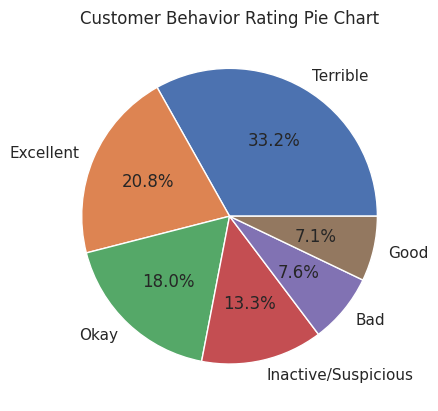

In [28]:
# Pie chart showing proportions in each group
plt.pie(x=account_dim["confidence_group"].value_counts(),labels=account_dim["confidence_group"].value_counts().index, autopct='%1.1f%%')
plt.title("Customer Behavior Rating Pie Chart")
plt.show()